In [5]:
pip install faker

   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
    --------------------------------------- 0.0/1.8 MB 495.5 kB/s eta 0:00:04
   -------- ------------------------------- 0.4/1.8 MB 3.5 MB/s eta 0:00:01
   ----------------------- ---------------- 1.1/1.8 MB 6.8 MB/s eta 0:00:01
   ---------------------------------------  1.8/1.8 MB 9.7 MB/s eta 0:00:01
   ---------------------------------------- 1.8/1.8 MB 9.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [29]:
import pandas as pd
import numpy as np
from faker import Faker
from datetime import datetime,timedelta
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
fake = Faker()

In [31]:
# Constants
n_rows = 20000
payment_methods = ['Cash', 'Credit Card', 'UPI', 'Net Banking']
order_statuses = ['Delivered', 'Cancelled', 'Pending']
locations = ['Mumbai', 'Delhi', 'Bangalore', 'Chennai', 'Kolkata', 'Hyderabad', 'Pune', 'Ahmedabad']
food_items = ['Pizza', 'Burger', 'Pasta', 'Biryani', 'Sandwich', 'Tacos', 'Sushi', 'Salad', 'Ice Cream', 'Cake']
delivery_partners = ['Swiggy', 'Zomato', 'Uber Eats']

In [32]:
data = {
    'Order_ID': [fake.uuid4() for _ in range(n_rows)],
    'Customer_Name': [fake.name() for _ in range(n_rows)],
    'Food_Item': [random.choice(food_items) for _ in range(n_rows)],
    'Location': [random.choice(locations) for _ in range(n_rows)],
    'Order_Date': [datetime.combine(fake.date_between(start_date='-1y', end_date='today'), datetime.min.time()) for _ in range(n_rows)],
    'Order_Amount': np.random.randint(100, 2000, size=n_rows),
    'Payment_Method': [random.choice(payment_methods) for _ in range(n_rows)],
    'Order_Status': [random.choice(order_statuses) for _ in range(n_rows)],
    'Delivery_Partner': [random.choice(delivery_partners) for _ in range(n_rows)],
    'Delivery_Time_in_Minutes': np.random.randint(15, 120, size=n_rows)
}

In [33]:
df = pd.DataFrame(data)

In [34]:
df

,Order_ID,Customer_Name,Food_Item,Location,Order_Date,Order_Amount,Payment_Method,Order_Status,Delivery_Partner,Delivery_Time_in_Minutes
0,0c50a039-6331-458a-b18b-d2bf599e237d,Elizabeth Torres,Pizza,Bangalore,2023-11-09,1761,Cash,Delivered,Swiggy,36
1,d670596e-eb53-4109-8d9d-f921532c3392,Sean Smith,Pizza,Delhi,2023-10-05,626,Credit Card,Pending,Swiggy,64
2,d97193fb-6747-4d45-b3bf-9ad80b4b0c7a,Thomas King,Ice Cream,Hyderabad,2023-10-06,1974,UPI,Cancelled,Zomato,113
3,2f988289-7ead-4d52-b45c-50adf164992e,Michael Hernandez,Biryani,Chennai,2024-08-20,1420,Net Banking,Pending,Zomato,49
4,4982f5cf-98d5-4646-aebe-6bc7882fd296,Richard Adams,Ice Cream,Kolkata,2024-07-15,1489,Credit Card,Delivered,Swiggy,113
...,...,...,...,...,...,...,...,...,...,...
19995,93d58e4f-6ea9-4de6-9ba0-295f0104cdff,Charles Simmons,Cake,Ahmedabad,2024-01-05,1536,Net Banking,Pending,Swiggy,116
19996,9f558833-f61b-4644-b1cd-b5f09cf5cfb2,Jordan Lang,Biryani,Delhi,2023-12-26,1579,UPI,Pending,Uber Eats,98
19997,7a9b1a02-063b-4b4f-b4c1-912af1b634f5,Nicole Lewis,Ice Cream,Mumbai,2024-04-02,563,UPI,Pending,Swiggy,93
19998,3c36b3fb-067f-4671-a14c-1a37cd6df995,Nicole Ray,Burger,Pune,2024-02-05,820,Credit Card,Cancelled,Swiggy,75


In [35]:
df.to_excel('Yamaan.xlsx')

In [36]:
# Standardize Payment Method formats
df['Payment_Method'] = df['Payment_Method'].str.strip().str.lower()

# Handle missing values for Delivery Time
df['Delivery_Time_in_Minutes'].fillna(df['Delivery_Time_in_Minutes'].mean(), inplace=True)

# Remove duplicates based on Order_ID
df.drop_duplicates(subset='Order_ID', inplace=True)

# Convert Order_Date to datetime
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

#Standardize Customer Names (Remove leading/trailing spaces)
df['Customer_Name'] = df['Customer_Name'].str.strip()


C:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


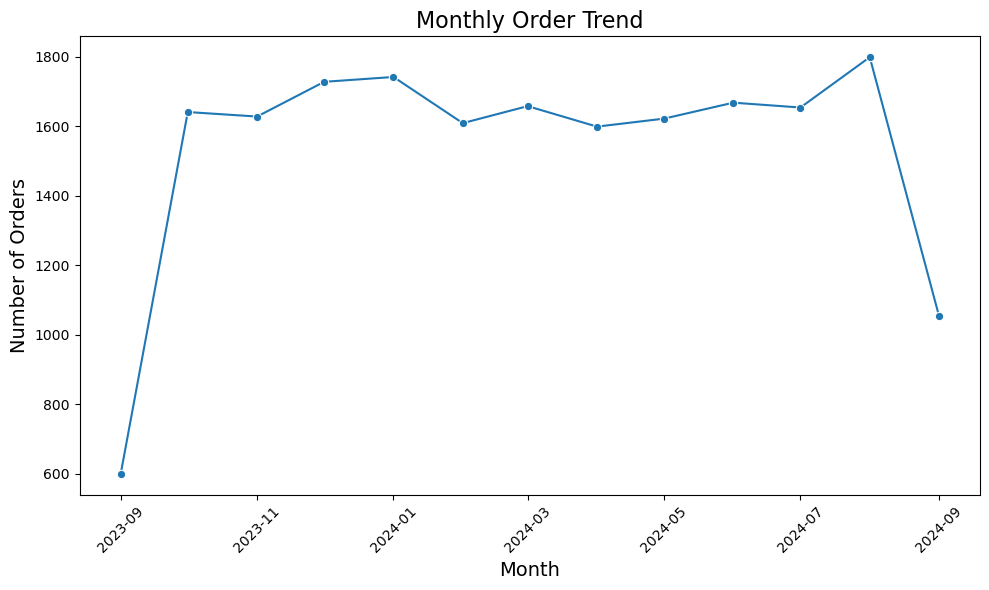

In [37]:
df['Month'] = df['Order_Date'].dt.to_period('M')

# Group by 'Month' and count the number of 'Order_ID'
monthly_orders = df.groupby('Month')['Order_ID'].count().reset_index()

# Convert 'Month' back to a timestamp for proper plotting
monthly_orders['Month'] = monthly_orders['Month'].dt.to_timestamp()

# Plotting the data
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_orders, x='Month', y='Order_ID', marker='o')

# Adding titles and labels
plt.title('Monthly Order Trend', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Orders', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

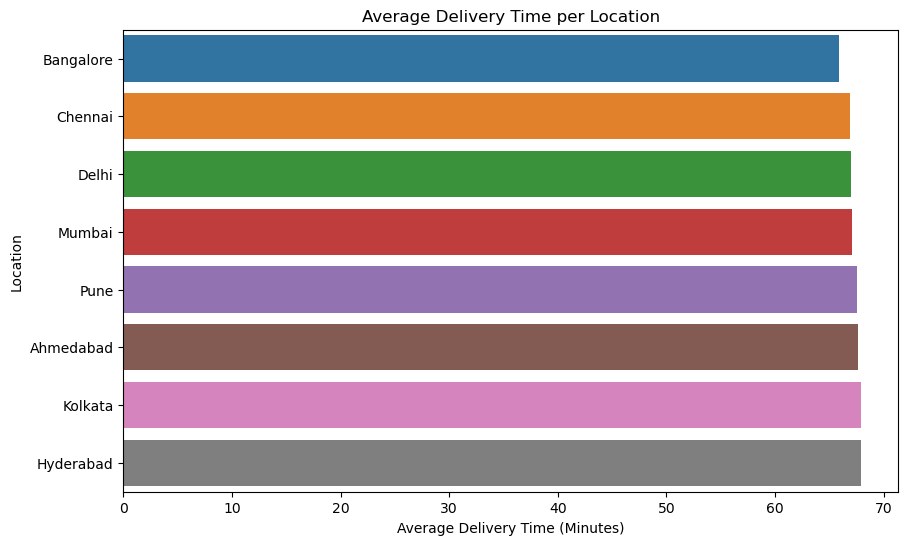

In [38]:
avg_delivery_time = df.groupby('Location')['Delivery_Time_in_Minutes'].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_delivery_time.values, y=avg_delivery_time.index)
plt.title('Average Delivery Time per Location')
plt.xlabel('Average Delivery Time (Minutes)')
plt.ylabel('Location')
plt.show()

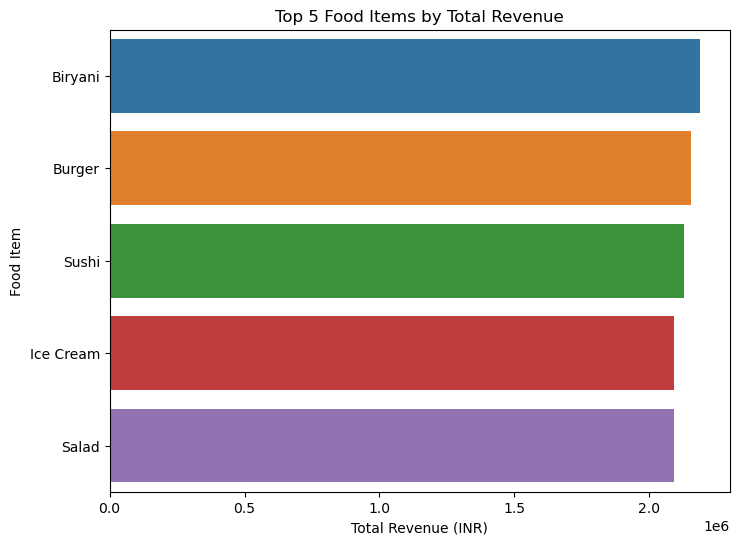

In [39]:
top_food_items = df.groupby('Food_Item')['Order_Amount'].sum().nlargest(5)

plt.figure(figsize=(8, 6))
sns.barplot(x=top_food_items.values, y=top_food_items.index)
plt.title('Top 5 Food Items by Total Revenue')
plt.xlabel('Total Revenue (INR)')
plt.ylabel('Food Item')
plt.show()


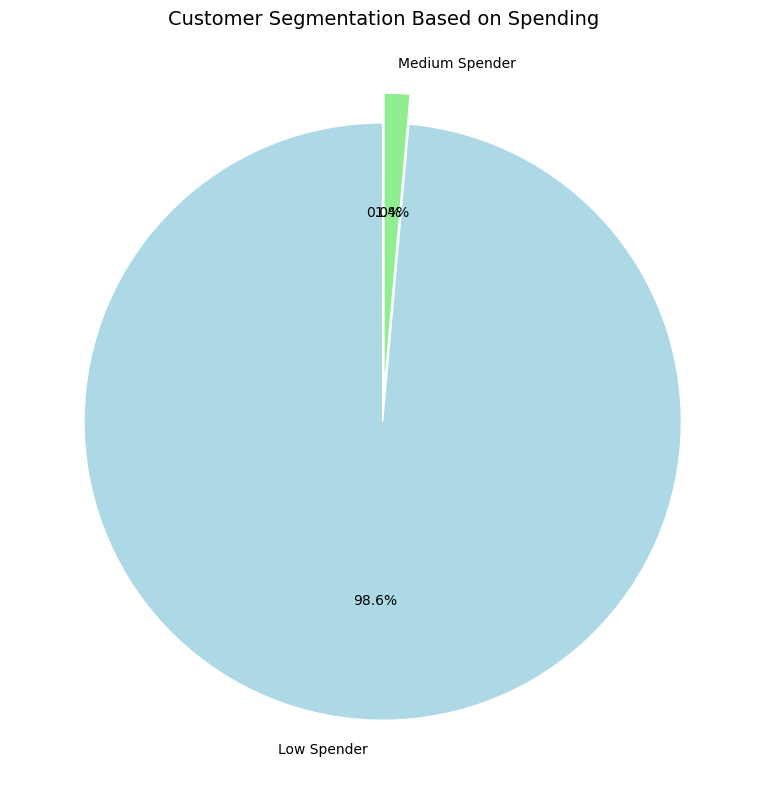

In [40]:
df['Total_Spent'] = df.groupby('Customer_Name')['Order_Amount'].transform('sum')
df['Spender_Category'] = pd.cut(df['Total_Spent'], 
                                bins=[0, 5000, 15000, np.inf], 
                                labels=['Low Spender', 'Medium Spender', 'High Spender'])

spender_distribution = df['Spender_Category'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))  # Increase the figure size to reduce overlap
spender_distribution.plot.pie(
    autopct='%1.1f%%', 
    colors=['lightblue', 'lightgreen', 'salmon'], 
    startangle=90,  # Rotating the start angle
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'},  # Add wedge properties for clarity
    explode=(0.05, 0.05, 0.05)  # Slightly explode all segments
)

# Adding title and improving the display
plt.title('Customer Segmentation Based on Spending', fontsize=14)
plt.ylabel('') 
plt.tight_layout() 
plt.show()

<Figure size 1000x600 with 0 Axes>

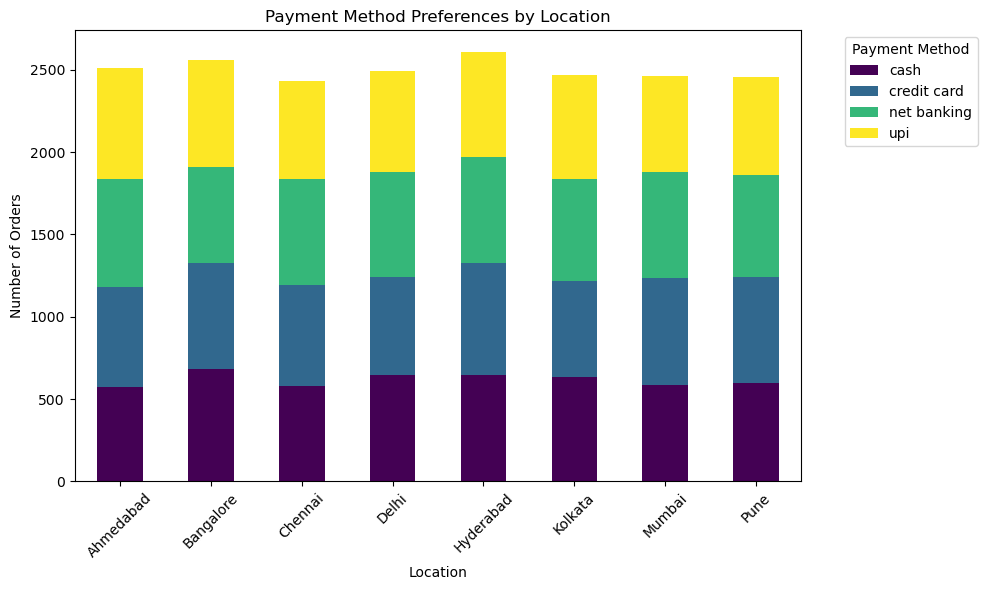

In [41]:
payment_location = df.groupby(['Location', 'Payment_Method'])['Order_ID'].count().unstack()

plt.figure(figsize=(10, 6))
payment_location.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10,6))
plt.title('Payment Method Preferences by Location')
plt.xlabel('Location')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.legend(title='Payment Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

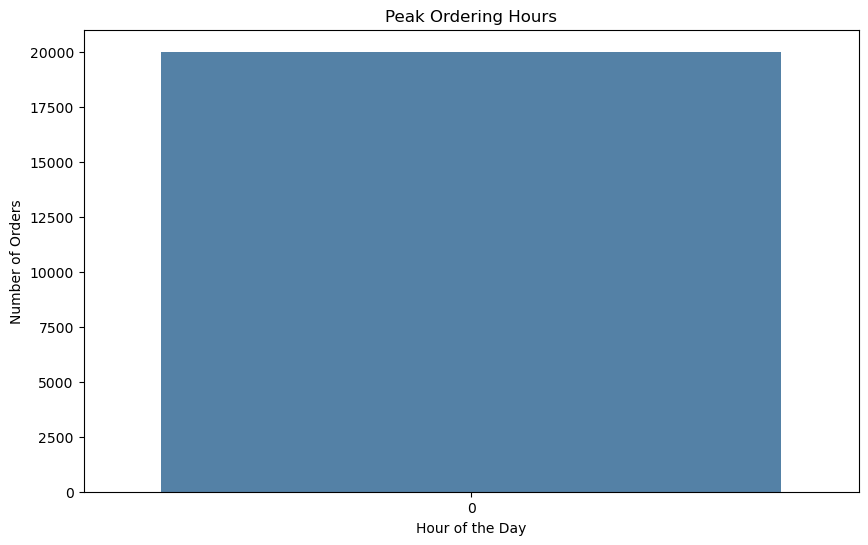

In [42]:
df['Order_Hour'] = df['Order_Date'].dt.hour
order_hours = df['Order_Hour'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=order_hours.index, y=order_hours.values, color='steelblue')
plt.title('Peak Ordering Hours')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.show()

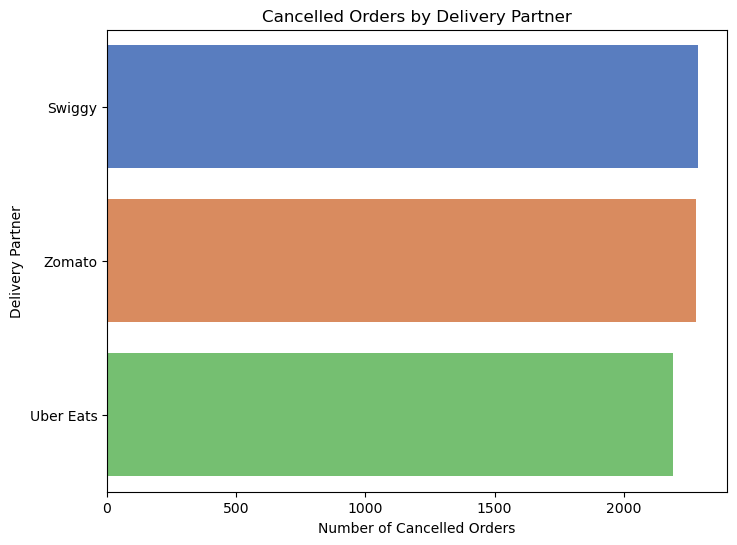

In [43]:
cancelled_orders = df[df['Order_Status'] == 'Cancelled']
cancelled_by_partner = cancelled_orders['Delivery_Partner'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=cancelled_by_partner.values, y=cancelled_by_partner.index, palette='muted')
plt.title('Cancelled Orders by Delivery Partner')
plt.xlabel('Number of Cancelled Orders')
plt.ylabel('Delivery Partner')
plt.show()


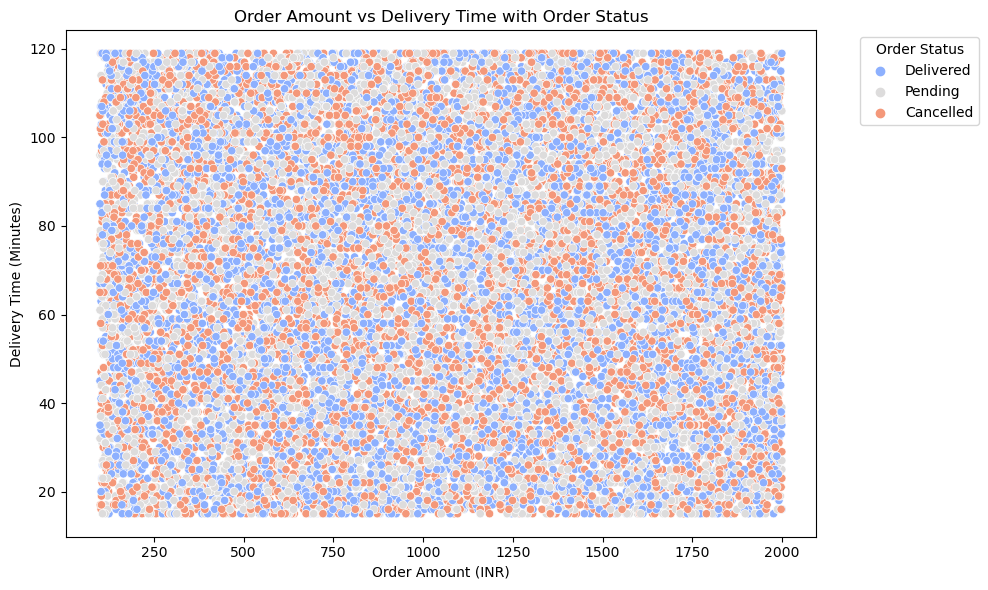

In [44]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Order_Amount', y='Delivery_Time_in_Minutes', data=df, hue='Order_Status', palette='coolwarm')
plt.title('Order Amount vs Delivery Time with Order Status')
plt.xlabel('Order Amount (INR)')
plt.ylabel('Delivery Time (Minutes)')
plt.legend(title='Order Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [45]:
top_1_percent_value = df['Order_Amount'].quantile(0.99)
top_1_percent_orders = df[df['Order_Amount'] > top_1_percent_value]
revenue_top_1_percent = top_1_percent_orders['Order_Amount'].sum()
total_revenue = df['Order_Amount'].sum()

print(f"Total revenue: ₹{total_revenue}")
print(f"Revenue from top 1% orders: ₹{revenue_top_1_percent}")
print(f"Percentage contribution of top 1% orders: {revenue_top_1_percent / total_revenue * 100:.2f}%")


Total revenue: ₹20966120
Revenue from top 1% orders: ₹398094
Percentage contribution of top 1% orders: 1.90%


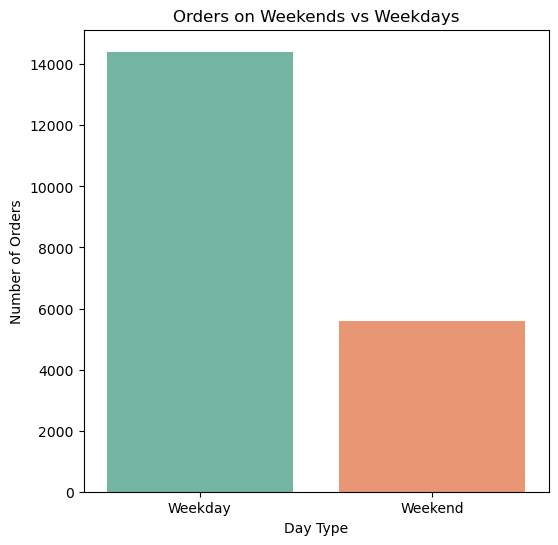

In [46]:
df['Day_of_Week'] = df['Order_Date'].dt.dayofweek
df['Is_Weekend'] = df['Day_of_Week'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

weekend_orders = df['Is_Weekend'].value_counts()

plt.figure(figsize=(6, 6))
sns.barplot(x=weekend_orders.index, y=weekend_orders.values, palette='Set2')
plt.title('Orders on Weekends vs Weekdays')
plt.xlabel('Day Type')
plt.ylabel('Number of Orders')
plt.show()